In [0]:
https://colab.research.google.com/drive/1H0iymWw2u7rGHLKoAjIJa-yQ7qDRlfCp

import cv2
import numpy as np

In [0]:
import cv2
import numpy as np

ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1

cv2.imwrite( "ann_1.png" ,ann_img )

True

In [0]:
!ls

0001TP_006690.png
171211_RoederSamen_FLAIR_Lipid0028.tif
171211_RoederSamen_FLAIR_Lipid_8bit0058.png
171211_RoederSamen_FLAIR_Lipid_8bit0079.raw
171211_RoederSamen_FLAIR_Lipid.gray.Labels0034.png
171211_RoederSamen_FLAIR_Lipid.Labels0034.png
ann_1.png
sample_data


In [0]:
from google.colab import files
#img = cv2.imread('ann_1.png', 0)
#img = open_image('ann_1.png')
uploaded = files.upload()

Saving 171211_RoederSamen_FLAIR_Lipid.Labels0034.png to 171211_RoederSamen_FLAIR_Lipid.Labels0034.png


In [0]:
img = cv2.imread('$path/')
u=np.unique(img[120,:,:])
#cv2.imwrite( "171211_RoederSamen_FLAIR_Lipid.gray.Labels0034.png" ,img )
img[50, 100, :]

array([255, 255, 255], dtype=uint8)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = 'drive/My Drive/DriveUploader/ImageSequence'
!ls '$path'

test  test_annotations	train  train_annotations  vgg_unet_1


In [0]:
img = cv2.imread(path+'/train_annotations/flair0108.bmp')
np.unique(img)

array([  0, 102, 153, 170, 244, 255], dtype=uint8)

In [0]:
img = cv2.imread(path+'/train_annotations/flair0051.bmp', 0)
cv2.imwrite(path+'/new_folder/ann_1.png' , img )

True

In [0]:
!pip install keras-segmentation




     |████████████████████████████████| 3.3MB 6.7MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=29072 sha256=e6feab006cf672e97f48dc5adbce4d4f810d128e1af0bd3f6b0cf5c46460b8ac
  Stored in directory: /root/.cache/pip/wheels/d0/bb/c0/6aad88b38f6e46db048bed4cccb904a5897055a8ab6fbd4dfc
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from keras_segmentation.models.unet import vgg_unet
model = vgg_unet(n_classes=5 ,  input_height=160, input_width=480  )

model.train(
    train_images =  path+'/train/',
    train_annotations = path+'/train_annotations/',
    checkpoints_path = path+'/vgg_unet_1' , epochs=4
)



Using TensorFlow backend.






58892288/58889256 [==============================] - 1s 0us/step













  0%|          | 0/280 [00:00<?, ?it/s]

Verifying training dataset


100%|██████████| 280/280 [02:39<00:00,  1.75it/s]

Dataset verified! 
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Epoch 1/4
512/512 [==============================] - 3764s 7s/step - loss: 0.6023 - acc: 0.7731
saved  drive/My Drive/DriveUploader/ImageSequence/vgg_unet_1.0
Epoch 2/4
512/512 [==============================] - 3757s 7s/step - loss: 0.3339 - acc: 0.8776
saved  drive/My Drive/DriveUploader/ImageSequence/vgg_unet_1.1
Epoch 3/4
512/512 [==============================] - 3753s 7s/step - loss: 0.1332 - acc: 0.9540
saved  drive/My Drive/DriveUploader/ImageSequence/vgg_unet_1.2
Epoch 4/4
512/512 [==============================] - 3753s 7s/step - loss: 0.1000 - acc: 0.9637
saved  drive/My Drive/DriveUploader/ImageSequence/vgg_unet_1.3


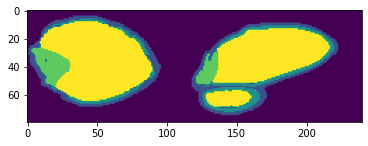

In [0]:
out = model.predict_segmentation(
    inp= path+'/test/flair0050.bmp',
    out_fname="./tmp/out.bmp"
)

import matplotlib.pyplot as plt
plt.imshow(out)



In [0]:
# bulk prediction doesn't work for some reason so I'm segmenting test images in loop
import os
output_directory = path+"/test_output/"
input_directory = path+"/test/"
for filename in os.listdir(input_directory):
    if filename.endswith(".bmp"):
         filepath = os.path.join(input_directory, filename)
         print(filepath)
         out = model.predict_segmentation(
         inp= filepath,
         out_fname=output_directory+filename
)

drive/My Drive/DriveUploader/ImageSequence/test/flair0010.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0030.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0060.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0040.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0020.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0050.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0080.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0100.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0070.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0090.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0110.bmp
drive/My Drive/DriveUploader/ImageSequence/test/nirvana0020.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0160.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0120.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0150.bmp
drive/My Drive/DriveUploader/ImageSequence/test/flair0140.bmp
drive/

In [0]:
# evaluating the model 
print(model.evaluate_segmentation( inp_images_dir=path+'/test/',   annotations_dir=path+'/test_annotations/' ) )

31it [00:40,  1.32s/it]

{'frequency_weighted_IU': 0.946057821413889, 'mean_IU': 0.007178769942749085, 'class_wise_IU': array([0.96627989, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0. 

In [0]:
from keras_segmentation.predict import predict_multiple

# doesnt work from pre-saved model for some reason
predict_multiple( 
	#checkpoints_path= "./chekpoints/vgg_unet_1.4", 
	inp_dir= path+"/test/", 
	out_dir=path+"/test_output/" 
)

0it [00:00, ?it/s]


[]

In [0]:
checkpoints_path= path + "/vgg_unet_1/"
checkpoints_path

'drive/My Drive/DriveUploader/ImageSequence/vgg_unet_1/'

In [0]:
directory = path+"/test_output/" 

img = cv2.imread(directory + 'flair0150.bmp' )
print(img)

[[[197 215  20]
  [197 215  20]
  [197 215  20]
  ...
  [197 215  20]
  [197 215  20]
  [197 215  20]]

 [[197 215  20]
  [197 215  20]
  [197 215  20]
  ...
  [197 215  20]
  [197 215  20]
  [197 215  20]]

 [[197 215  20]
  [197 215  20]
  [197 215  20]
  ...
  [197 215  20]
  [197 215  20]
  [197 215  20]]

 ...

 [[197 215  20]
  [197 215  20]
  [197 215  20]
  ...
  [197 215  20]
  [197 215  20]
  [197 215  20]]

 [[197 215  20]
  [197 215  20]
  [197 215  20]
  ...
  [197 215  20]
  [197 215  20]
  [197 215  20]]

 [[197 215  20]
  [197 215  20]
  [197 215  20]
  ...
  [197 215  20]
  [197 215  20]
  [197 215  20]]]
